# Problem Set 3: Convolutional Neural Networks 

## instructions

Please submit a version of this notebook containing your answers **together with your trained model** on CATe as CW2.zip. Write your answers in the cells below each question.

### Setting up working environment 

For this coursework you will need to train a large network, therefore we recommend you work with Google Colaboratory, which provides free GPU time. You will need a Google account to do so. 

Please log in to your account and go to the following page: https://colab.research.google.com. Then upload this notebook.

For GPU support, go to "Edit" -> "Notebook Settings", and select "Hardware accelerator" as "GPU".

You will need to install pytorch by running the following cell:

In [ ]:
% pip install torch torchvision

## Introduction

For this coursework you will implement one of the most commonly used model for image recognition tasks, the Residual Network. The architecture is introduced in 2015 by Kaiming He, et al. in the paper ["Deep residual learning for image recognition"](https://www.cv-foundation.org/openaccess/content_cvpr_2016/papers/He_Deep_Residual_Learning_CVPR_2016_paper.pdf). 
<br>

In a residual network, each block contains some convolutional layers, plus "skip" connections, which allow the activations to by pass a layer, and then be summed up with the activations of the skipped layer. The image below illustrates a building block in residual networks.

![resnet-block](utils/resnet-block.png)

Depending on the number of building blocks, resnets can have different architectures, for example ResNet-50, ResNet-101 and etc. Here you are required to build ResNet-18 to perform classification on the CIFAR-10 dataset, therefore your network will have the following architecture:

![resnet](utils/resnet.png)

## Part 1 (40 points)

In this part, you will use basic pytorch operations to define the 2D convolution, max pooling operation, linear layer as well as 2d batch normalization. 

### YOUR TASK

- implement the forward pass for Conv2D, MaxPool2D, Linear and BatchNorm2d
- You are **NOT** allowed to use the torch.nn modules

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Conv2d(nn.Module):
    def __init__(self,
                 in_channels,
                 out_channels,
                 kernel_size,
                 stride=1,
                 padding=0,
                 bias=True):

        super(Conv2d, self).__init__()
        """
        An implementation of a convolutional layer.

        The input consists of N data points, each with C channels, height H and
        width W. We convolve each input with F different filters, where each filter
        spans all C channels and has height HH and width WW.

        Parameters:
        - w: Filter weights of shape (F, C, HH, WW)
        - b: Biases, of shape (F,)
        - kernel_size: Size of the convolving kernel
        - stride: The number of pixels between adjacent receptive fields in the
            horizontal and vertical directions.
        - padding: The number of pixels that will be used to zero-pad the input.
        """

        ########################################################################
        # TODO: Define the parameters used in the forward pass                 #
        ########################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        self.w = torch.rand(
            [out_channels, in_channels, kernel_size, kernel_size])
        self.b = torch.rand([out_channels])
        self.use_bias=bias
        self.stride = stride
        self.padding = padding

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        ########################################################################
        #                             END OF YOUR CODE                         #
        ########################################################################

    def forward(self, x):
        """
        Input:
        - x: Input data of shape (N, C, H, W)
        Output:
        - out: Output data, of shape (N, F, H', W').
        """

        ########################################################################
        # TODO: Implement the forward pass                                     #
        ########################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        N, C, H, W = x.shape
        F, _, K, _ = self.w.shape
        h = int((H-K+2*self.padding)/self.stride+1)
        w = int((W-K+2*self.padding)/self.stride+1)
        out = torch.empty([N, F, h, w])
        x_pad = torch.zeros([N, C, self.padding*2+H, self.padding*2+W])
        x_pad[:, :, self.padding:self.padding +
              H, self.padding:self.padding+W] = x
        if self.use_bias:
            for n in range(N):
                for f in range(F):
                    for i in range(h):
                        for j in range(w):
                            out[n, f, i, j] = torch.sum(
                                x_pad[n, :, self.stride*i:self.stride*i+K, self.stride*j:self.stride*j+K].mul(self.w[f, :, :, :]))+self.b[f]
        else:
            for n in range(N):
                for f in range(F):
                    for i in range(h):
                        for j in range(w):
                            out[n, f, i, j] = torch.sum(
                                x_pad[n, :, self.stride*i:self.stride*i+K, self.stride*j:self.stride*j+K].mul(self.w[f, :, :, :]))

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        ########################################################################
        #                             END OF YOUR CODE                         #
        ########################################################################

        return out


d:\Anaconda\envs\NovelAI\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
class MaxPool2d(nn.Module):
    def __init__(self, kernel_size):
        super(MaxPool2d, self).__init__()
        """
        An implementation of a max-pooling layer.

        Parameters:
        - kernel_size: the size of the window to take a max over
        """
        ########################################################################
        # TODO: Define the parameters used in the forward pass                 #
        ########################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        self.kernel_size = kernel_size

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        ########################################################################
        #                             END OF YOUR CODE                         #
        ########################################################################

    def forward(self, x):
        """
        Input:
        - x: Input data of shape (N, C, H, W)
        Output:
        - out: Output data, of shape (N, F, H', W').
        """
        ########################################################################
        # TODO: Implement the forward pass                                     #
        ########################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        N, C, H, W = x.shape
        stride = 2
        h = int((H-self.kernel_size)/stride+1)
        w = int((W-self.kernel_size)/stride+1)
        out = torch.rand([N, C, h, w])
        for n in range(N):
            for c in range(C):
                for i in range(h):
                    for j in range(w):
                        tmp, t = torch.max(x[n, c, i*stride:self.kernel_size+i*stride,
                                           j*stride:self.kernel_size+j*stride], dim=0)
                        out[:, :, i, j] = torch.max(tmp)

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        ########################################################################
        #                             END OF YOUR CODE                         #
        ########################################################################

        return out



In [3]:
class Linear(nn.Module):
    def __init__(self, in_channels, out_channels, bias=True):
        super(Linear, self).__init__()
        """
        An implementation of a Linear layer.

        Parameters:
        - weight: the learnable weights of the module of shape (in_channels, out_channels).
        - bias: the learnable bias of the module of shape (out_channels).
        """
        ########################################################################
        # TODO: Define the parameters used in the forward pass                 #
        ########################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        self.weight = torch.ones([in_channels, out_channels])
        self.bias = torch.ones([out_channels])
        self.ues_bias = bias

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        ########################################################################
        #                             END OF YOUR CODE                         #
        ########################################################################

    def forward(self, x):
        """
        Input:
        - x: Input data of shape (N, *, H) where * means any number of additional
        dimensions and H = in_channels
        Output:
        - out: Output data of shape (N, *, H') where * means any number of additional
        dimensions and H' = out_channels
        """
        ########################################################################
        # TODO: Implement the forward pass                                     #
        ########################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        N, W, _ = x.shape
        _, Out = self.weight.shape
        out = torch.empty([N, W, Out])
        if self.ues_bias:
            for i in range(x.shape[0]):
                out[i] = x[i] @ self.weight+self.bias
        else:
            for i in range(x.shape[0]):
                out[i] = x[i] @ self.weight

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        ########################################################################
        #                             END OF YOUR CODE                         #
        ########################################################################

        return out



In [4]:
class BatchNorm2d(nn.Module):
    def __init__(self, num_features, eps=1e-05, momentum=0.1):
        super(BatchNorm2d, self).__init__()
        """
        An implementation of a Batch Normalization over a mini-batch of 2D inputs.

        The mean and standard-deviation are calculated per-dimension over the
        mini-batches and gamma and beta are learnable parameter vectors of
        size num_features.

        Parameters:
        - num_features: C from an expected input of size (N, C, H, W).
        - eps: a value added to the denominator for numerical stability. Default: 1e-5
        - momentum: momentum - the value used for the running_mean and running_var
        computation. Default: 0.1
        - gamma: the learnable weights of shape (num_features).
        - beta: the learnable bias of the module of shape (num_features).
        """
        ########################################################################
        # TODO: Define the parameters used in the forward pass                 #
        ########################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        self.num_features = num_features
        self.eps = eps
        self.momentum = momentum
        self.gamma = torch.ones(num_features)
        self.beta = torch.ones(num_features)
        self.running_var = torch.zeros(num_features)
        self.running_mean = torch.zeros(num_features)

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        ########################################################################
        #                             END OF YOUR CODE                         #
        ########################################################################

    def forward(self, x):
        """
        During training this layer keeps running estimates of its computed mean and
        variance, which are then used for normalization during evaluation.
        Input:
        - x: Input data of shape (N, C, H, W)
        Output:
        - out: Output data of shape (N, C, H, W) (same shape as input)
        """
        ########################################################################
        # TODO: Implement the forward pass                                     #
        #       (be aware of the difference for training and testing)          #
        ########################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        N, C, H, W = x.shape
        x_temp = x.transpose(1, 2).transpose(2, 3).reshape(N*H*W, C)
        mean_x = x_temp.mean(axis=0)
        var_x = x_temp.var(axis=0)
        out = (x_temp-mean_x)/torch.sqrt(var_x+self.eps)
        self.running_mean = self.momentum * self.running_mean + (1 - self.momentum) * mean_x
        self.running_var = self.momentum * self.running_var + (1 - self.momentum) * var_x
        out = out.reshape(N, H, W, C).transpose(2,3).transpose(1,2)

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        ########################################################################
        #                             END OF YOUR CODE                         #
        ########################################################################

        return x



## Part 2

In this part, you will train a ResNet-18 defined on the CIFAR-10 dataset. Code for training and evaluation are provided. 

### Your Task

1. Train your network to achieve the best possible test set accuracy after a maximum of 10 epochs of training.

2. You can use techniques such as optimal hyper-parameter searching, data pre-processing

3. If necessary, you can also use another optimizer

4. **Answer the following question:**
Given such a network with a large number of trainable parameters, and a training set of a large number of data, what do you think is the best strategy for hyperparameter searching? 

A:
First, we check initial loss. Secondly, try to overfit a small sample in order to find a good initialization with learning rate and weight. Then, use all training data to find a better learning rate that makes loss go down. Try to train small epochs(1~5) to find a coarse gid of hyperparameters that works. Then, loop to refine the grid above and train longer to look at loss and accuracy curves, and finally pick the best hyperparameters.

Considering there are a large number of trainable parameters and data, the process of training and searching hyperparameter must be quite slow, which means we need to use strategies that are fast enough. Grid Search is too slow and if the step is too large, this algorithm may fail to find the best hyperparameters. Random Search can do better with this problem and can possibly find the best hyperparameters. So when searching the grid hyperparameters in pipeline above, a better choice is to apply Random Search.

In [5]:
import torch
from torch.nn import Conv2d, MaxPool2d
import torch.nn as nn
import torch.nn.functional as F

Next, we define ResNet-18:

In [6]:
# define resnet building blocks

class ResidualBlock(nn.Module): 
    def __init__(self, inchannel, outchannel, stride=1): 
        
        super(ResidualBlock, self).__init__() 
        
        self.left = nn.Sequential(Conv2d(inchannel, outchannel, kernel_size=3, 
                                         stride=stride, padding=1, bias=False), 
                                  nn.BatchNorm2d(outchannel), 
                                  nn.ReLU(inplace=True), 
                                  Conv2d(outchannel, outchannel, kernel_size=3, 
                                         stride=1, padding=1, bias=False), 
                                  nn.BatchNorm2d(outchannel)) 
        
        self.shortcut = nn.Sequential() 
        
        if stride != 1 or inchannel != outchannel: 
            
            self.shortcut = nn.Sequential(Conv2d(inchannel, outchannel, 
                                                 kernel_size=1, stride=stride, 
                                                 padding = 0, bias=False), 
                                          nn.BatchNorm2d(outchannel) ) 
            
    def forward(self, x): 
        
        out = self.left(x) 
        
        out += self.shortcut(x) 
        
        out = F.relu(out) 
        
        return out


    
    # define resnet

class ResNet(nn.Module):
    
    def __init__(self, ResidualBlock, num_classes = 10):
        
        super(ResNet, self).__init__()
        
        self.inchannel = 64
        self.conv1 = nn.Sequential(Conv2d(3, 64, kernel_size = 3, stride = 1,
                                            padding = 1, bias = False), 
                                  nn.BatchNorm2d(64), 
                                  nn.ReLU())
        
        self.layer1 = self.make_layer(ResidualBlock, 64, 2, stride = 1)
        self.layer2 = self.make_layer(ResidualBlock, 128, 2, stride = 2)
        self.layer3 = self.make_layer(ResidualBlock, 256, 2, stride = 2)
        self.layer4 = self.make_layer(ResidualBlock, 512, 2, stride = 2)
        self.maxpool = MaxPool2d(4)
        self.fc = nn.Linear(512, num_classes)
        
    
    def make_layer(self, block, channels, num_blocks, stride):
        
        strides = [stride] + [1] * (num_blocks - 1)
        
        layers = []
        
        for stride in strides:
            
            layers.append(block(self.inchannel, channels, stride))
            
            self.inchannel = channels
            
        return nn.Sequential(*layers)
    
    
    def forward(self, x):
        
        x = self.conv1(x)
        
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        
        x = self.maxpool(x)
        
        x = x.view(x.size(0), -1)
        
        x = self.fc(x)
        
        return x
    
    
def ResNet18():
    return ResNet(ResidualBlock)

### Loading dataset
We will import images from the [torchvision.datasets](https://pytorch.org/docs/stable/torchvision/datasets.html) library <br>
First, we need to define the alterations (transforms) we want to perform to our images - given that transformations are applied when importing the data. <br>
Define the following transforms using the torchvision.datasets library -- you can read the transforms documentation [here](https://pytorch.org/docs/stable/torchvision/transforms.html): <br>
1. Convert images to tensor
2. Normalize mean and std of images with values:mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010]

In [7]:
import torch
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler

import torchvision.datasets as dset

import numpy as np

import torchvision.transforms as T

##############################################################
#                       YOUR CODE HERE                       #
##############################################################

my_transform = T.Compose([
    T.ToTensor(),
    T.Normalize(np.array([0.4914, 0.4822, 0.4465]), np.array([0.2023, 0.1994, 0.2010]))])


##############################################################
#                       END OF YOUR CODE                     #
##############################################################


Now load the dataset using the transform you defined above, with batch_size = 64<br>
You can check the documentation [here](https://pytorch.org/docs/stable/torchvision/datasets.html).
Then create data loaders (using DataLoader from torch.utils.data) for the training and test set

In [8]:

##############################################################
#                       YOUR CODE HERE                       #
##############################################################

data_dir = './data'

cifar10_train = dset.CIFAR10(
    root=data_dir,
    train=True,
    download=True,
    transform=my_transform
)

cifar10_test = dset.CIFAR10(
    root=data_dir,
    train=False,
    download=True,
    transform=my_transform
)

loader_train = DataLoader(cifar10_train, batch_size=64, shuffle=True)
loader_test = DataLoader(cifar10_test, batch_size=64, shuffle=True)

##############################################################
#                       END OF YOUR CODE                     #
##############################################################


Files already downloaded and verified
Files already downloaded and verified


In [9]:
USE_GPU = True
dtype = torch.float32 

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
    
    

print_every = 100
def check_accuracy(loader, model):
    # function for test accuracy on validation and test set
    
    if loader.dataset.train:
        print('Checking accuracy on validation set')
    else:
        print('Checking accuracy on test set')   
    num_correct = 0
    num_samples = 0
    model.eval()  # set model to evaluation mode
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device, dtype=dtype)  # move to device
            y = y.to(device=device, dtype=torch.long)
            scores = model(x)
            _, preds = scores.max(1)
            num_correct += (preds == y).sum()
            num_samples += preds.size(0)
        acc = float(num_correct) / num_samples
        print('Got %d / %d correct (%.2f)' % (num_correct, num_samples, 100 * acc))

        

def train_part(model, optimizer, epochs=1):
    """
    Train a model on CIFAR-10 using the PyTorch Module API.
    
    Inputs:
    - model: A PyTorch Module giving the model to train.
    - optimizer: An Optimizer object we will use to train the model
    - epochs: (Optional) A Python integer giving the number of epochs to train for
    
    Returns: Nothing, but prints model accuracies during training.
    """
    model = model.to(device=device)  # move the model parameters to CPU/GPU
    for e in range(epochs):
        print(len(loader_train))
        for t, (x, y) in enumerate(loader_train):
            model.train()  # put model to training mode
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)

            scores = model(x)
            loss = F.cross_entropy(scores, y)

            # Zero out all of the gradients for the variables which the optimizer
            # will update.
            optimizer.zero_grad()

            loss.backward()

            # Update the parameters of the model using the gradients
            optimizer.step()

            if t % print_every == 0:
                print('Epoch: %d, Iteration %d, loss = %.4f' % (e, t, loss.item()))
                #check_accuracy(loader_val, model)
                print()

In [10]:
# code for optimising your network performance

##############################################################
#                       YOUR CODE HERE                       #       
##############################################################



##############################################################
#                       END OF YOUR CODE                     #
##############################################################


# define and train the network
model = ResNet18()
optimizer = optim.Adam(model.parameters())

train_part(model, optimizer, epochs = 10)

# report test set accuracy

check_accuracy(loader_test, model)


# save the model
torch.save(model.state_dict(), 'model.pt')

782
Epoch: 0, Iteration 0, loss = 4.7309

Epoch: 0, Iteration 100, loss = 1.7085

Epoch: 0, Iteration 200, loss = 1.7277

Epoch: 0, Iteration 300, loss = 1.3770

Epoch: 0, Iteration 400, loss = 1.3763

Epoch: 0, Iteration 500, loss = 1.2013

Epoch: 0, Iteration 600, loss = 1.4449

Epoch: 0, Iteration 700, loss = 1.0428

782
Epoch: 1, Iteration 0, loss = 0.8002

Epoch: 1, Iteration 100, loss = 0.8010

Epoch: 1, Iteration 200, loss = 0.9147

Epoch: 1, Iteration 300, loss = 1.1333

Epoch: 1, Iteration 400, loss = 0.9320

Epoch: 1, Iteration 500, loss = 0.6566

Epoch: 1, Iteration 600, loss = 0.9421

Epoch: 1, Iteration 700, loss = 0.8372

782
Epoch: 2, Iteration 0, loss = 0.6507

Epoch: 2, Iteration 100, loss = 0.6083

Epoch: 2, Iteration 200, loss = 0.5071

Epoch: 2, Iteration 300, loss = 0.4813

Epoch: 2, Iteration 400, loss = 0.5073

Epoch: 2, Iteration 500, loss = 0.4537

Epoch: 2, Iteration 600, loss = 0.5793

Epoch: 2, Iteration 700, loss = 0.3691

782
Epoch: 3, Iteration 0, loss = 

## Part 3

The code provided below will allow you to visualise the feature maps computed by different layers of your network. Run the code (install matplotlib if necessary) and **answer the following questions**: 

1. Compare the feature maps from low-level layers to high-level layers, what do you observe? 

2. Use the training log, reported test set accuracy and the feature maps, analyse the performance of your network. If you think the performance is sufficiently good, explain why; if not, what might be the problem and how can you improve the performance?

3. What are the other possible ways to analyse the performance of your network?

**YOUR ANSWER FOR PART 3 HERE**

A:
1. Compared to high-leve layers, the feature maps from low-level layers contains more details, and they are much more larger while the quantity is smaller. With layer going deeper, the feature maps becomes smaller and more blur. As for the quantity, layer1 has the same quantity of feature maps as conv1, but from layer2 on, the quantity of feature maps from layer(x) increases up to double of layer(x-1). This phenomenon is lead by the design of this network, the outchannel of layer(x) is two times as layer(x-1) in the definition of this network.
    
2. In training log, as the number of iterations increases, the loss value continues to decline. In epoch 8 and 9, the loss begin to oscillate around about 0.06. What's more, feature maps from the last layer are quite different after traning, which means our model works well and can find features more clearly. In general, the trend of loss goes right, but the oscillation amplitude is as large as about 0.04, it does not be convergent. The test set accuracy is about 0.83, which is not very satisfying. So I don't think the performance is sufficiently good. From feature maps of conv1, we can find some features are quite different from others, that maybe the noise. As a result, a possible way to improve is to preprocess the data set to filter out the noisy images. As for the oscillation of loss value, we can try to update the learning rate to a smaller one when we detect such oscillation, so that we can decline the oscillation amplitude and eventually make the loss to be convergent. What's more, we can try to optimize the hyperpramaters with advanced strategy like Bayesian Optimization, so that we can get better hyperpramaters to improve the performance.
   
3. - Test speed and train speed. Train a model of a network can be slow, this is acceptable, but the faster the better(under the premise of ensuring accuracy). However the test speed must be fast because once we put it into practice, we need it to give the answer as quick as possible. So the speed of train and test can be another way to evaluate the performance of the network.

   - Confusion Matrix. From Confusion Matrix, we can get more advanced classification score (sunch as recall, precision, or PR/ROC curve), and use these to evaluate the performance of our network. 


<Figure size 640x480 with 0 Axes>

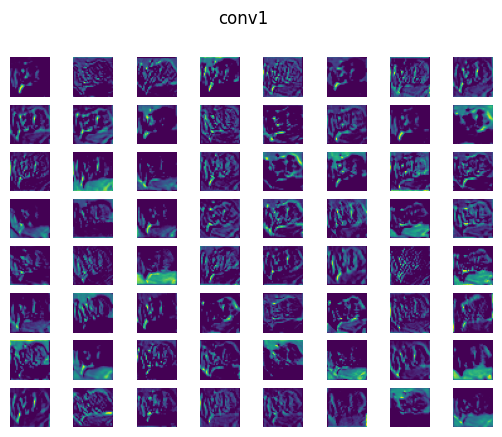

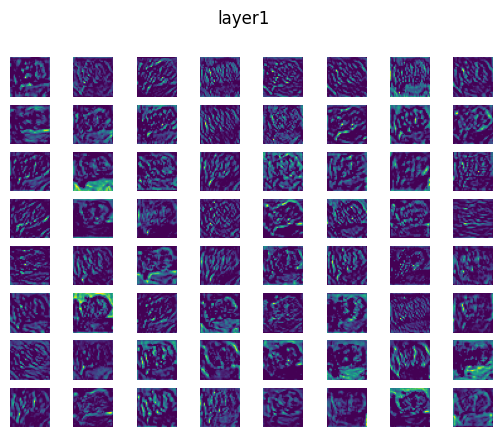

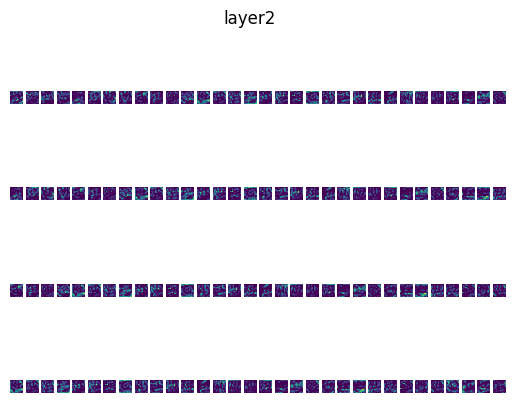

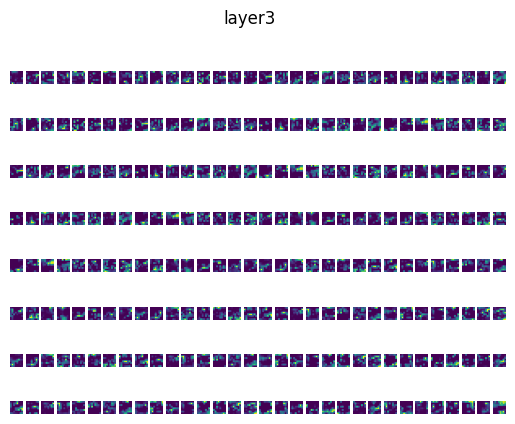

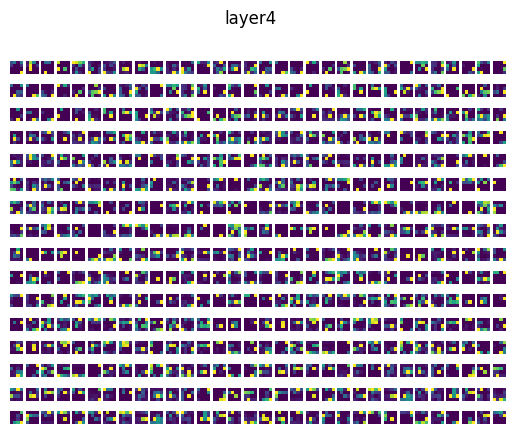

In [11]:
#!pip install matplotlib

import matplotlib.pyplot as plt

plt.tight_layout()


activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

vis_labels = ['conv1', 'layer1', 'layer2', 'layer3', 'layer4']

for l in vis_labels:

    getattr(model, l).register_forward_hook(get_activation(l))
    
    
data, _ = cifar10_test[0]
data = data.unsqueeze_(0).to(device = device, dtype = dtype)

output = model(data)



for idx, l in enumerate(vis_labels):

    act = activation[l].squeeze()

    if idx < 2:
        ncols = 8
    else:
        ncols = 32
        
    nrows = act.size(0) // ncols
    
    fig, axarr = plt.subplots(nrows, ncols)
    fig.suptitle(l)


    for i in range(nrows):
        for j in range(ncols):
            axarr[i, j].imshow(act[i * nrows + j].cpu())
            axarr[i, j].axis('off')